# 双向循环神经网络

# 一个隐藏层是有两个 输出是两个的和

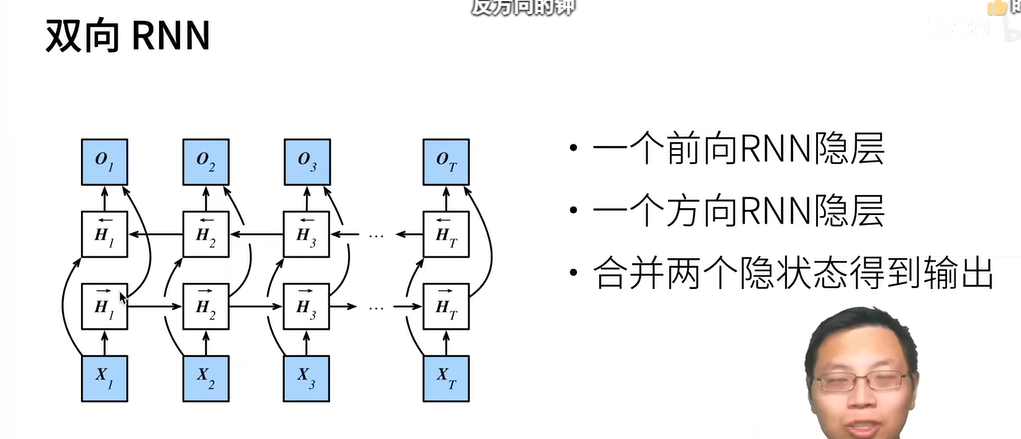

# 实现上

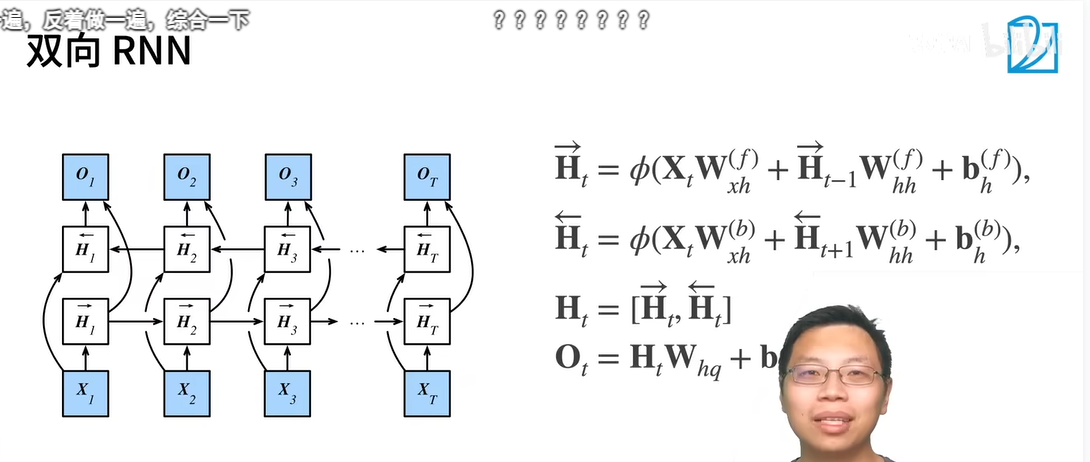



上下文很重要 目前的RNN只看过去

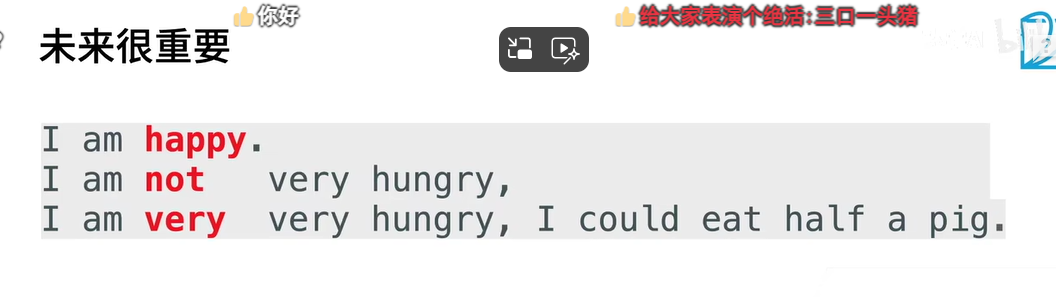

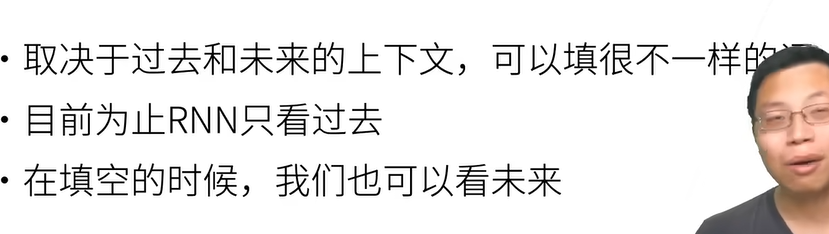

# 训练和推理

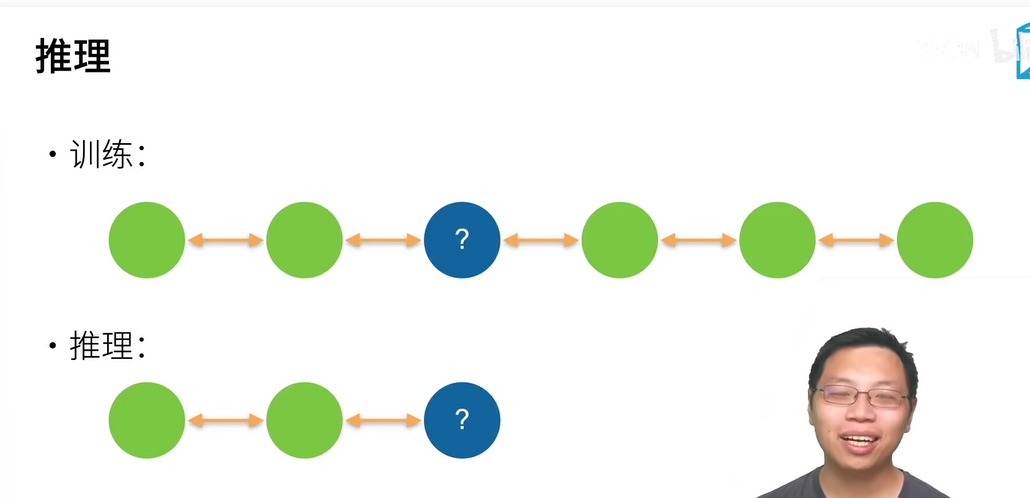

训练好训练 基本不能做推理

双向RNN不做推理 主要的作用是对句子做特征提取，填空

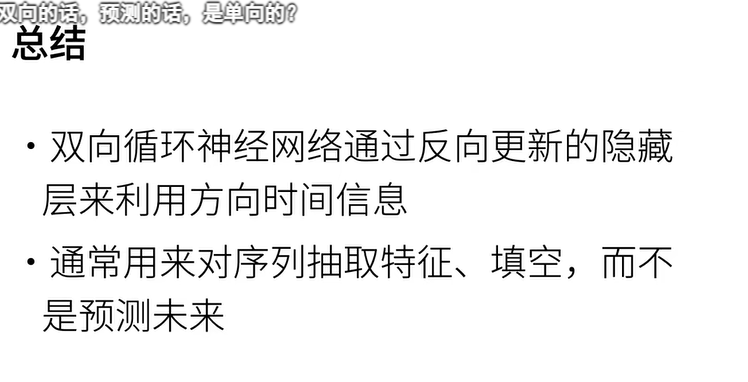

perplexity 1.1, 172215.9 tokens/sec on cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


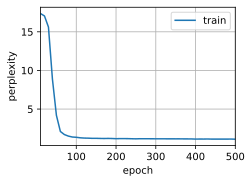

In [1]:
# 双向RNN的实现
import torch  # 导入 PyTorch 库
from torch import nn  # 从 PyTorch 导入神经网络模块
from d2l import torch as d2l  # 从 d2l 库导入用于工具的 PyTorch 版本

# 加载数据
batch_size, num_steps, device = 32, 35, d2l.try_gpu()  # 设置批次大小、序列长度和计算设备
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)  # 加载时间机器数据集

# 设置模型参数
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2  # 词汇表大小、隐藏层单元数和 LSTM 层数
num_inputs = vocab_size  # 输入特征数量等于词汇表大小

# 创建双向 LSTM 层
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True)

# 构建 RNN 模型
model = d2l.RNNModel(lstm_layer, len(vocab))  # 创建 RNN 模型实例，传入 LSTM 层和词汇表大小

# 将模型移动到指定的设备（如 CPU 或 GPU）
model = model.to(device)

# 设置训练超参数
num_epochs, lr = 500, 1  # 设置训练的轮数和学习率

# 训练模型
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)  # 开始训练模型
